# Teste com árvore de decisão no dataset básico de razão de autovalores

Esse jupyter é só pra verificar se as árvores conseguem enxergar o threshold daquela razão de autovalores da matriz R do Kapetanovic em função de qtd de antenas, símbolos na sequência piloto e tal...

Um dataset foi criado com os seguintes atributos:

**qtdUsuarios:** FEATURE

**qtdAntenas:** FEATURE

**qtdSimbolos:** FEATURE

**snr:** FEATURE

**razaoAutovalores:** FEATURE (PRINCIPAL) 

**potenciaEspiao_TARGET:** TARGET (não precisa mas vamos deixar ele ai caso a gnt queira mexer com regressão depois)

**ataquePresente_TARGET:** TARGET (PRINCIPAL)

## Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    'figure.figsize': [5, 2.5], 
    'axes.labelsize': 14,
    'axes.titlesize':16, 
    'font.size': 14,
    'legend.fontsize': 10, 
    'xtick.labelsize': 10, 
    'ytick.labelsize': 10,
    'axes.axisbelow': True
}
plt.rcParams.update(params)

## Definição de Funções

### Função para abrir o CSV e retornar data e target

Ainda pode-se aplicar um filtro enviando a qtd de usuários desejada e a snr mínima.

In [3]:
def obterDados(caminhoCSV, qtdAntenas=None, qtdSimbolos=None, qtdMaxUsuarios=None, snrMinima=None):
    
    # ABRO O CSV
    datasetCSV = pd.read_csv(caminhoCSV)
    
    # SITUACAO FIXA (QTD DE ANTENAS E SIMBOLOS)
    if qtdAntenas != None:
        datasetCSV = datasetCSV.loc[(datasetCSV['qtdAntenas'] == qtdAntenas)]
    if qtdSimbolos != None:
        datasetCSV = datasetCSV.loc[(datasetCSV['qtdSimbolos'] == qtdSimbolos)]
    
    # FILTROS PARA QTD MAX DE USUARIOS CONECTADOS E SNR MINIMA
    if qtdMaxUsuarios != None:
        datasetCSV = datasetCSV.loc[(datasetCSV['qtdUsuarios'] <= qtdMaxUsuarios)]
    if snrMinima != None:
        datasetCSV = datasetCSV.loc[(datasetCSV['snr'] >= snrMinima)]

    # SEPARANDO DATA E TARGET
    data   = datasetCSV[datasetCSV.columns[:-2]].to_numpy()
    target = datasetCSV[datasetCSV.columns[-1]].to_numpy()
    
    # RETORNO OS DADOS
    return data, target

### Funçao para rodar um bootstrap cross validation e retornar a soma das matrizes de confusão

In [4]:
def classificar(data, target, classificador, qtdHoldouts, percentualTreinamento):

    # SOMAR A MATRIZ DE CONFUSAO DE CADA ITERACAO
    matrizesConfusaoSomadas = np.array([[0,0],[0,0]])

    # PARA CADA HOLDOUT
    for i in range(qtdHoldouts):

        # SEPARANDO OS DADOS ALEATORIAMENTE
        xTrain, xTest, yTrain, yTest = train_test_split(data, target, train_size=percentualTreinamento)

        # TREINANDO O CLASSIFICADOR
        objClassificador = eval(classificador)
        objClassificador.fit(xTrain, yTrain)

        # PREDIZENDO OS DE TESTE
        yPred = objClassificador.predict(xTest)

        # MATRIZ DE CONFUSAO
        matrizesConfusaoSomadas += confusion_matrix(yTest, yPred)
        
        # PRINT DO PROGRESSO
        clear_output(wait=True)
        display("Progresso: " + str(100*((i+1)/qtdHoldouts))[:7] + "%")
        
    return matrizesConfusaoSomadas

### Função pra printar as métricas

In [5]:
def printar(matrizesConfusaoSomadas):#, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima):
    
#     print("CENÁRIO:")
#     print("qtdAntenas      =", qtdAntenas)
#     print("qtdSimbolos     =", qtdSimbolos)
#     print("qtdMaxUsuarios  =", qtdMaxUsuarios)
#     print("snrMinima       =", snrMinima)
    print("Acurácia =", (matrizesConfusaoSomadas[0][0]+matrizesConfusaoSomadas[1][1])/np.sum(matrizesConfusaoSomadas))

    plt.imshow(matrizesConfusaoSomadas, cmap="gray")

    for (j,i), total in np.ndenumerate(matrizesConfusaoSomadas):
        plt.text(i, j, total, ha="center", va="center", color="tab:red")

    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.xticks([0,1], ["Normal", "Ataque"])
    plt.yticks([0,1], ["Normal", "Ataque"], rotation=90)
    plt.show()

## Parâmetros Iniciais

In [6]:
# CAMINHO PRO CSV
caminhoCSV            = "/home/dimi/Programming/Pilot-Contamination-Detection-Massive-MIMO/CSV/dataset_1598814711.0016496.csv"

# PARAMETROS DO BOOTSTRAP
qtdHoldouts           = 5
percentualTreinamento = 0.75

# CLASSIFICADOR DESEJADO
classificador         = "RandomForestClassifier(n_estimators=10)"

# TESTES

## Cenário 1: 

qtdAntenas  = 256

qtdSimbolos = 100

In [7]:
qtdAntenas     = 256
qtdSimbolos    = 100

### 1 Usuário conectado SNR maior que 30 dB

'Progresso: 100.0%'

Acurácia = 0.9848484848484849


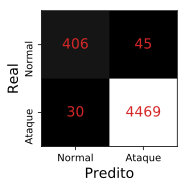

In [8]:
qtdMaxUsuarios = 1
snrMinima      = 30
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 1 Usuário conectado SNR maior que 0 dB

'Progresso: 100.0%'

Acurácia = 0.9829437229437229


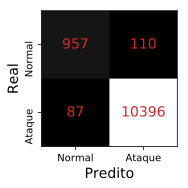

In [9]:
qtdMaxUsuarios = 1
snrMinima      = 0
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 1 Usuário conectado com todas as SNRs

'Progresso: 100.0%'

Acurácia = 0.9646831955922865


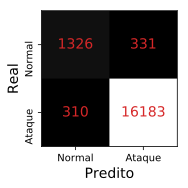

In [10]:
qtdMaxUsuarios = 1
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados SNR maior que 30 dB

'Progresso: 100.0%'

Acurácia = 0.9527272727272728


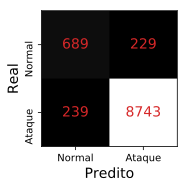

In [11]:
qtdMaxUsuarios = 2
snrMinima      = 30
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados SNR maior que 0 dB

'Progresso: 100.0%'

Acurácia = 0.9556277056277056


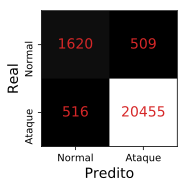

In [12]:
qtdMaxUsuarios = 2
snrMinima      = 0
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados todas as SNRs

'Progresso: 100.0%'

Acurácia = 0.9404132231404959


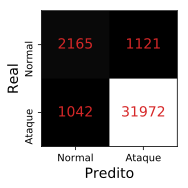

In [13]:
qtdMaxUsuarios = 2
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

## Cenário 2: 

qtdAntenas  = 256

qtdSimbolos = 50

In [14]:
qtdAntenas     = 256
qtdSimbolos    = 50

### 1 Usuário conectado SNR maior que 30 dB

'Progresso: 100.0%'

Acurácia = 0.9781818181818182


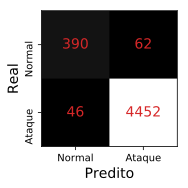

In [15]:
qtdMaxUsuarios = 1
snrMinima      = 30
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 1 Usuário conectado SNR maior que 0 dB

'Progresso: 100.0%'

Acurácia = 0.9777489177489177


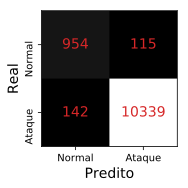

In [16]:
qtdMaxUsuarios = 1
snrMinima      = 0
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 1 Usuário conectado com todas as SNRs

'Progresso: 100.0%'

Acurácia = 0.9564187327823691


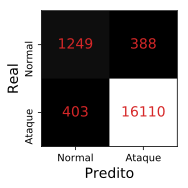

In [17]:
qtdMaxUsuarios = 1
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados SNR maior que 30 dB

'Progresso: 100.0%'

Acurácia = 0.9465656565656566


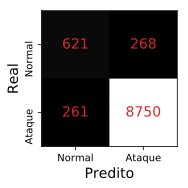

In [18]:
qtdMaxUsuarios = 2
snrMinima      = 30
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados SNR maior que 0 dB

'Progresso: 100.0%'

Acurácia = 0.9430735930735931


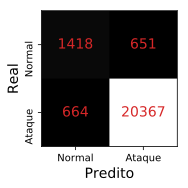

In [19]:
qtdMaxUsuarios = 2
snrMinima      = 0
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados todas as SNRs

'Progresso: 100.0%'

Acurácia = 0.9277134986225896


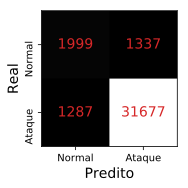

In [20]:
qtdMaxUsuarios = 2
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

## Cenário 3: 

qtdAntenas  = 256

qtdSimbolos = 10

In [21]:
qtdAntenas     = 256
qtdSimbolos    = 10

### 1 Usuário conectado SNR maior que 30 dB

'Progresso: 100.0%'

Acurácia = 0.9416161616161616


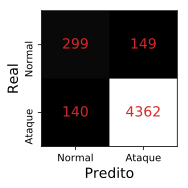

In [22]:
qtdMaxUsuarios = 1
snrMinima      = 30
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 1 Usuário conectado SNR maior que 0 dB

'Progresso: 100.0%'

Acurácia = 0.9343722943722944


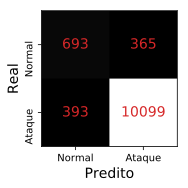

In [23]:
qtdMaxUsuarios = 1
snrMinima      = 0
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 1 Usuário conectado com todas as SNRs

'Progresso: 100.0%'

Acurácia = 0.9175206611570248


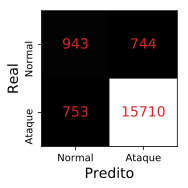

In [24]:
qtdMaxUsuarios = 1
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados SNR maior que 30 dB

'Progresso: 100.0%'

Acurácia = 0.9040404040404041


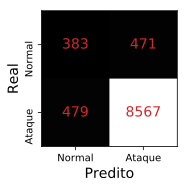

In [25]:
qtdMaxUsuarios = 2
snrMinima      = 30
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados SNR maior que 0 dB

'Progresso: 100.0%'

Acurácia = 0.9061038961038961


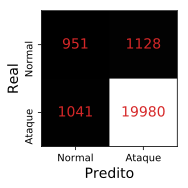

In [26]:
qtdMaxUsuarios = 2
snrMinima      = 0
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados todas as SNRs

'Progresso: 100.0%'

Acurácia = 0.8924793388429753


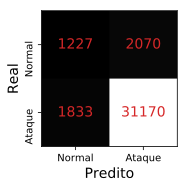

In [27]:
qtdMaxUsuarios = 2
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

## Cenário 4: 

qtdAntenas  = 64

qtdSimbolos = 100

In [28]:
qtdAntenas     = 64
qtdSimbolos    = 100

### 1 Usuário conectado SNR maior que 30 dB

'Progresso: 100.0%'

Acurácia = 0.9509090909090909


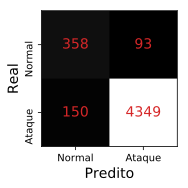

In [29]:
qtdMaxUsuarios = 1
snrMinima      = 30
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 1 Usuário conectado SNR maior que 0 dB

'Progresso: 100.0%'

Acurácia = 0.9505627705627706


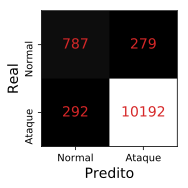

In [30]:
qtdMaxUsuarios = 1
snrMinima      = 0
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 1 Usuário conectado com todas as SNRs

'Progresso: 100.0%'

Acurácia = 0.9325068870523416


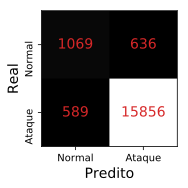

In [31]:
qtdMaxUsuarios = 1
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados SNR maior que 30 dB

'Progresso: 100.0%'

Acurácia = 0.9235353535353535


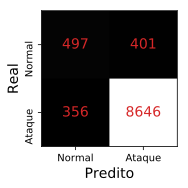

In [32]:
qtdMaxUsuarios = 2
snrMinima      = 30
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados SNR maior que 0 dB

'Progresso: 100.0%'

Acurácia = 0.918961038961039


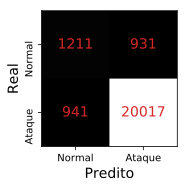

In [33]:
qtdMaxUsuarios = 2
snrMinima      = 0
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados todas as SNRs

'Progresso: 100.0%'

Acurácia = 0.909228650137741


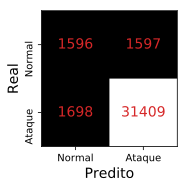

In [34]:
qtdMaxUsuarios = 2
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

## Cenário 5: 

qtdAntenas  = 64

qtdSimbolos = 10

In [35]:
qtdAntenas     = 64
qtdSimbolos    = 10

### 1 Usuário conectado SNR maior que 30 dB

'Progresso: 100.0%'

Acurácia = 0.9074747474747474


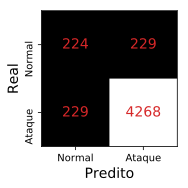

In [36]:
qtdMaxUsuarios = 1
snrMinima      = 30
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 1 Usuário conectado SNR maior que 0 dB

'Progresso: 100.0%'

Acurácia = 0.9105627705627706


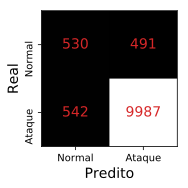

In [37]:
qtdMaxUsuarios = 1
snrMinima      = 0
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 1 Usuário conectado com todas as SNRs

'Progresso: 100.0%'

Acurácia = 0.8917355371900827


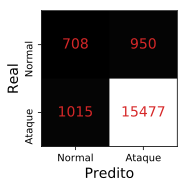

In [38]:
qtdMaxUsuarios = 1
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados SNR maior que 30 dB

'Progresso: 100.0%'

Acurácia = 0.8891919191919192


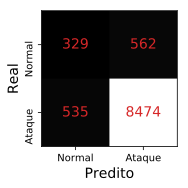

In [39]:
qtdMaxUsuarios = 2
snrMinima      = 30
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados SNR maior que 0 dB

'Progresso: 100.0%'

Acurácia = 0.8848917748917748


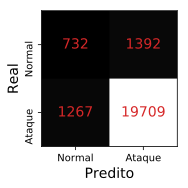

In [40]:
qtdMaxUsuarios = 2
snrMinima      = 0
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

### 2 Usuários conectados todas as SNRs

'Progresso: 100.0%'

Acurácia = 0.8781818181818182


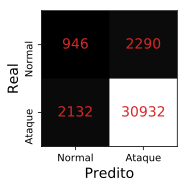

In [41]:
qtdMaxUsuarios = 2
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

## Cenário Livre: 

Colocar o que desejar

'Progresso: 100.0%'

Acurácia = 0.9100459136822773


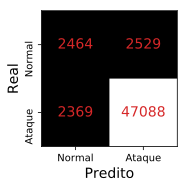

In [42]:
qtdAntenas     = 128
qtdSimbolos    = 75
qtdMaxUsuarios = None
snrMinima      = None
data, target = obterDados(caminhoCSV, qtdAntenas, qtdSimbolos, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

In [43]:
del data, target